In [57]:
!pip install yfinance

# Clase 2

In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import yfinance as yf

In [59]:
#datos = pd.read_csv('^SPX.csv')
datos = yf.download("^SPX", start="2020-01-01", end="2024-08-23")

[*********************100%***********************]  1 of 1 completed


In [60]:
datos.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


In [61]:
datos.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [62]:
#datos['Date'] = pd.to_datetime(datos['Date'])

datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1168 entries, 2020-01-02 to 2024-08-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1168 non-null   float64
 1   High       1168 non-null   float64
 2   Low        1168 non-null   float64
 3   Close      1168 non-null   float64
 4   Adj Close  1168 non-null   float64
 5   Volume     1168 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.9 KB


In [63]:
sp500 = datos["Adj Close"]

<Axes: xlabel='Date'>

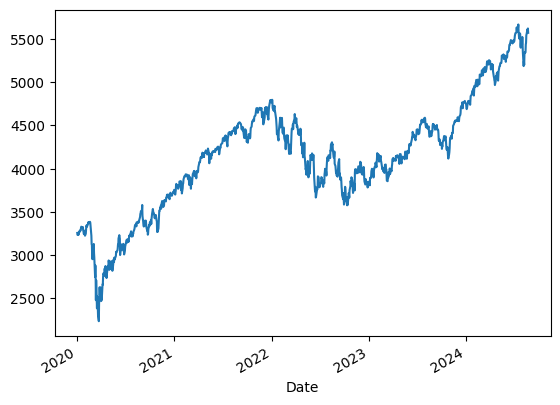

In [64]:
sp500.plot()

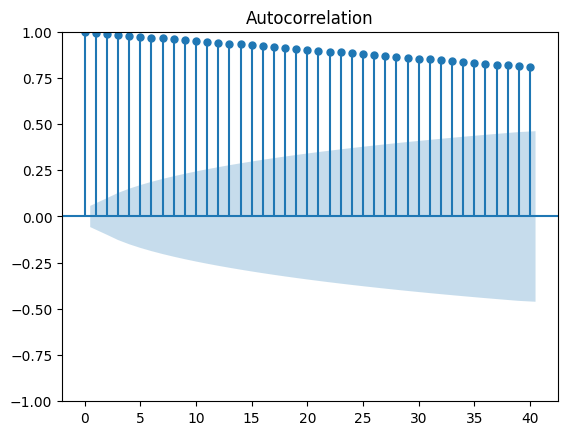

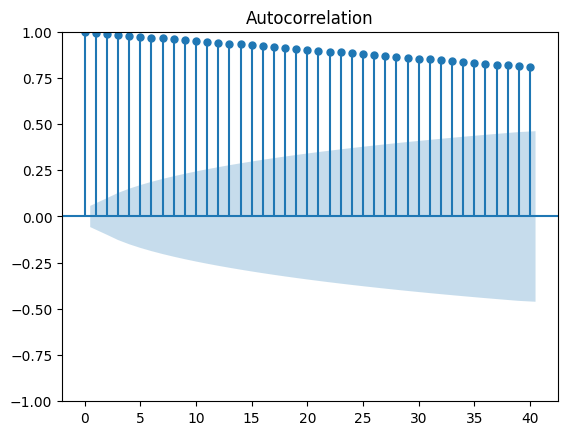

In [80]:
sm.graphics.tsa.plot_acf(sp500.values, lags=40)

In [66]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(sp500, autolag="AIC")


In [67]:
dftest

(np.float64(-0.553778889886928),
 np.float64(0.881087876215229),
 10,
 1157,
 {'1%': np.float64(-3.436014535478888),
  '5%': np.float64(-2.8640412872730208),
  '10%': np.float64(-2.56810174401953)},
 np.float64(12120.03259535101))

<Axes: xlabel='Date'>

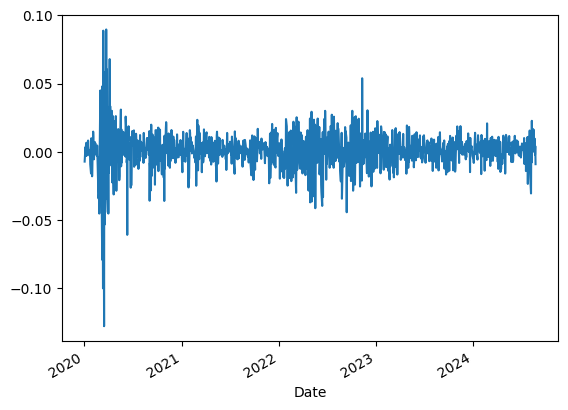

In [68]:
dlsp500 = np.log(sp500).diff().dropna()
dlsp500.plot()

<Axes: xlabel='Date'>

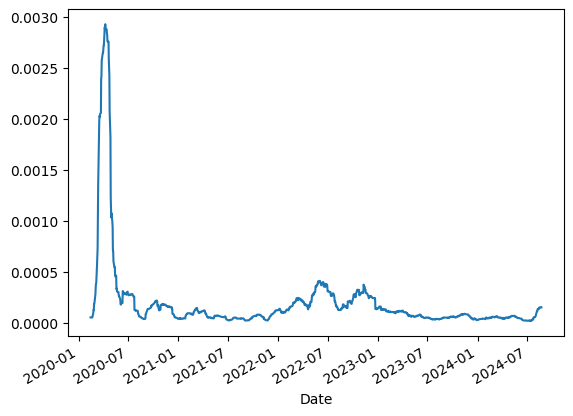

In [69]:
dlsp500.rolling(30).var().plot()

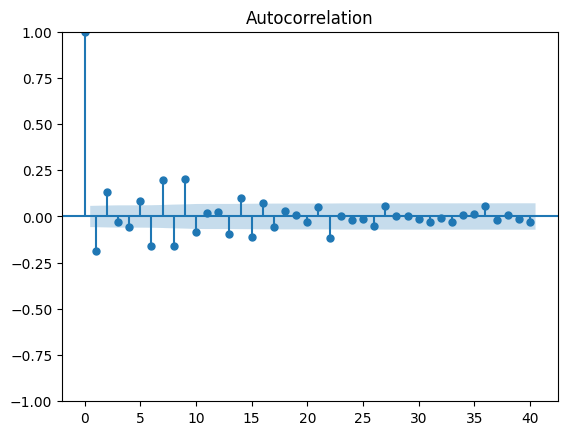

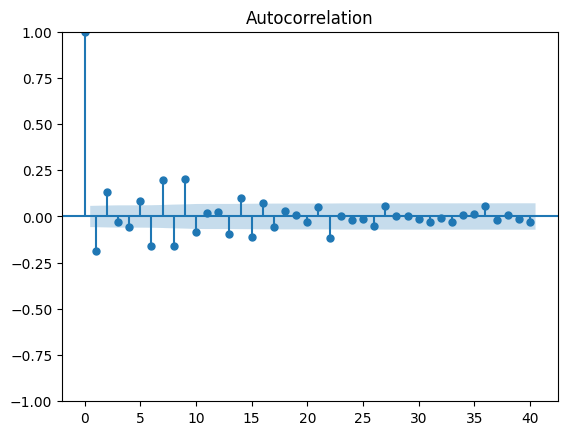

In [81]:
sm.graphics.tsa.plot_acf(dlsp500.values, lags=40)

<Axes: xlabel='Date'>

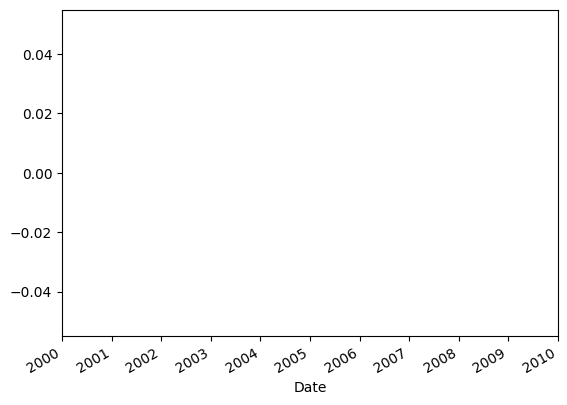

In [71]:
pro_mov = dlsp500.ewm(alpha = 1).std()
pro_mov.plot()

In [74]:
sm.graphics.tsaplots.plot_acf(dlsp500)


AttributeError: module 'statsmodels.graphics.api' has no attribute 'tsaplots'

In [77]:
import seaborn as sb

dlsp500_lag1 = dlsp500.shift()

data1 = pd.DataFrame({'sp': dlsp500, 'sp1': dlsp500_lag1})

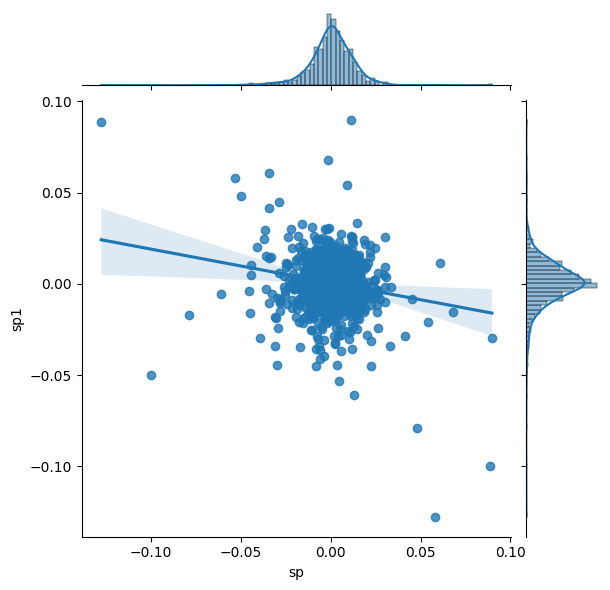

In [79]:
sb.jointplot(data1, x='sp', y='sp1', kind='reg')